In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


Problem Definition:
Nexux bank has conducted campaigns with the goal of acquiring deposits.
In the last board meeting, the directors where unsatisfied with their current situation
and need to optimize the operations at Nexus bank.
The Director of Nexux contacted you a Data Scientist because they are interested
in leveraging the power of their data to gain insights into the bank and improve their
efficiency. They want to identify patterns and trends in customer behavior to
decipher if customer demographics such as age, educational level e.t.c influences
customers attitude toward defaulting. The board specifically wants to anticipate
future customer behavior and know the likelihood of subscription to term deposits
from customers.

Nexux wants to understand how effective their campaigns are and thus
develop marketing campaigns to reach specific customer segments. By analyzing
customer behaviors, loan trends, and marketing campaign effectiveness, Nexus wants
to optimize its operations, mitigate risks/ loan defaults, and improve customer
subscription to term deposits.

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from collections import Counter
import pandas_profiling
from pandas_profiling import ProfileReport

In [30]:
# Load the dataset by Copying file path
df = pd.read_csv(r"C:\Users\Emmanuel.Ikukoyi.WAKANOW\Downloads\bank.csv")

In [31]:
#Print the top 5rows
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [32]:
# Column selection
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [33]:
# Categorical Statistical Analysis
df.describe(include=['object','bool'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome deposit  
count   45211    45211   45211  
unique     12        4       2  
top       may  unknown      no  
freq    13766    36959   39922

In [34]:
#Dimensionality of the dataset
df.shape

(45211, 17)

In [35]:
#Creating a duplicate
df1=df.copy()
df1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may       261         1     -1         0  unknown      no  
1    5   may       151         1     -1         0  unknown      no

In [36]:
# Investigating the Missing Data
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [37]:
#Indexing a portion of the dataframe
df1.loc[df1['job'] == 'unknown', 'job'] = 'blue-collar'

In [38]:
df1.loc[df1['education'] == 'unknown', 'education'] = 'secondary'

In [39]:
#Removing the rows that contains null values
df.dropna(inplace=True)

In [40]:
df1.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married  secondary      no     1506     yes   no   
4   33   blue-collar    single  secondary      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no  
5  unknown    5   may       139         1     -1         0  unknown      no  
6  unknown    5   may       217         1     -1         0  unknown      no  
7  unknown    5   may       380         1     -1         0  unknown      no  
8  unknown    5   may        50         1     -1         0  unknown      no  
9  unknown    5   may        55         1     -1         0  unknown      no

In [41]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [42]:
#Number of rows and columns
df.shape

(45211, 17)

In [43]:
#Investigating the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
#Numerical Statistical Analysis
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [45]:
# Print the top 5 rows
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [46]:
# Convert to Percentage
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

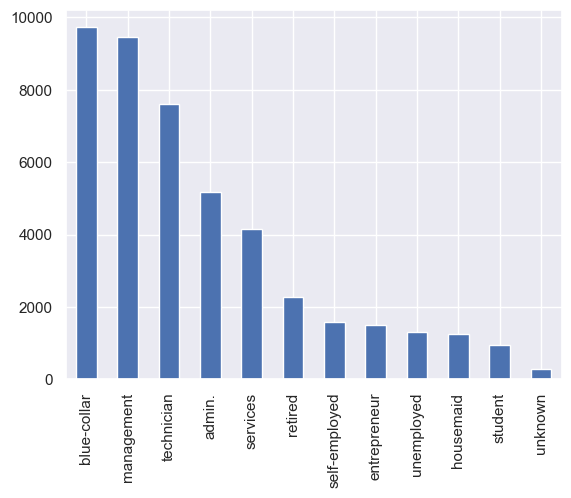

In [47]:
# UNIVARIATE ANALYSIS
df["job"].value_counts().plot(kind="bar");

Observation: 
It is observed that the blue collar Job occured the most.

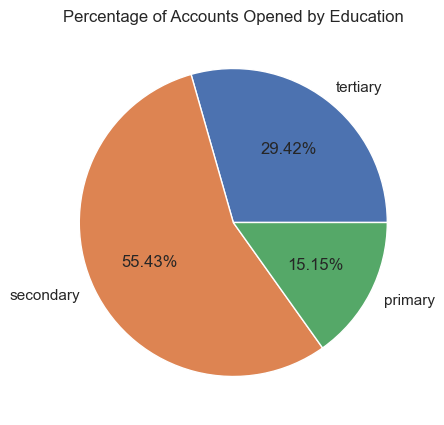

In [48]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df1['education'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Accounts Opened by Education')
plt.show();

Observation:
Secondary schools have the highest account opening with 55.43% whilst primary has the lowest with 15.15%

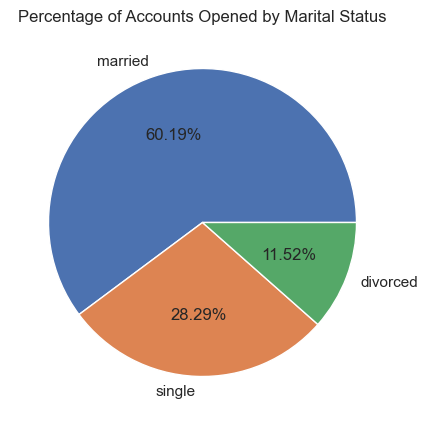

In [49]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df1['marital'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Accounts Opened by Marital Status')
plt.show();

Observation:
From here, 60.19% of accounts were opened by married couple whilst the divorced were the least with 11.52%

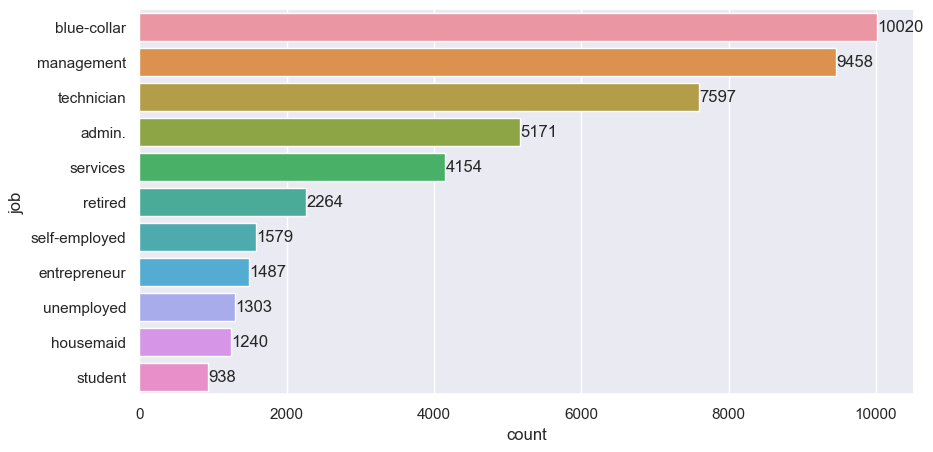

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=df1['job'], order=df1['job'].value_counts(ascending=False).index)
values = df1['job'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [51]:
# BIVARIATE ANALYSIS
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [52]:
cust_jobM = df.groupby("job")["marital"].count().reset_index
cust_jobM


<bound method Series.reset_index of job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: marital, dtype: int64>

In [53]:
def age_group(x):
    if x <= 25:
        return '<=25 Young Adult'
    elif x <= 40:
        return '25-40 Adult'
    elif x <=50:
        return '41-50 Old Adult'
    else:
        return '>=51 Elders'
    
#Apply function to the data
df1['age_group'] = df1['age'].apply(age_group)
df1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may       261         1     -1         0  unknown      no   
1    5   may       151         1     -1         0  unknown      no   

         age_group  
0      >=51 Elders  
1  41-50 Old Adult

In [62]:
cust_jobM = df1.groupby("job")["marital"].count().reset_index()
sns.barplot(x='job', data=cust_jobM, y='marital', ax=axs[0,0])
axs[0,0].set_title("Job by Marital Status")

Text(0.5, 1.0, 'Job by Marital Status')

In [56]:
cust_jobA = df1.groupby("job")["age_group"].count().reset_index()
sns.barplot(x='job', data=cust_jobA, y='age_group', ax=axs[0,1])
axs[0,1].set_title("Job by AgeGroup")


Text(0.5, 1.0, 'Job by AgeGroup')

In [57]:
cust_jobE = df1.groupby("education")["marital"].count().reset_index()
sns.barplot(x='education', data=cust_jobE, y='marital', ax=axs[0,1])
axs[0,1].set_title("Job by Marital Status")

Text(0.5, 1.0, 'Job by Marital Status')

In [58]:
cust_jobA = df1.groupby("age_group")["loan"].count().reset_index()
sns.barplot(x='age_group', data=cust_jobA, y='loan', ax=axs[0,2])
axs[0,2].set_title("AgeGroup by Loan")

Text(0.5, 1.0, 'AgeGroup by Loan')

In [59]:
cust_jobH = df1.groupby("marital")["housing"].count().reset_index()
sns.barplot(x='marital', data=cust_jobH, y='housing', ax=axs[1,0])
axs[1,0].set_title("Housing by Marital Status")

Text(0.5, 1.0, 'Housing by Marital Status')

In [60]:
cust_jobL = df1.groupby("marital")["loan"].count().reset_index()
sns.barplot(x='marital', data=cust_jobL, y='loan', ax=axs[1,1])
axs[1,1].set_title("Loan by Marital Status")

Text(0.5, 1.0, 'Loan by Marital Status')

In [61]:
cust_jobD = df1.groupby("age_group")["default"].count().reset_index()
sns.barplot(x='age_group', data=cust_jobD, y='default', ax=axs[1,1])
axs[1,1].set_title("Default by AgeGroup")

Text(0.5, 1.0, 'Default by AgeGroup')

Text(0.5, 1.0, 'Default by AgeGroup')

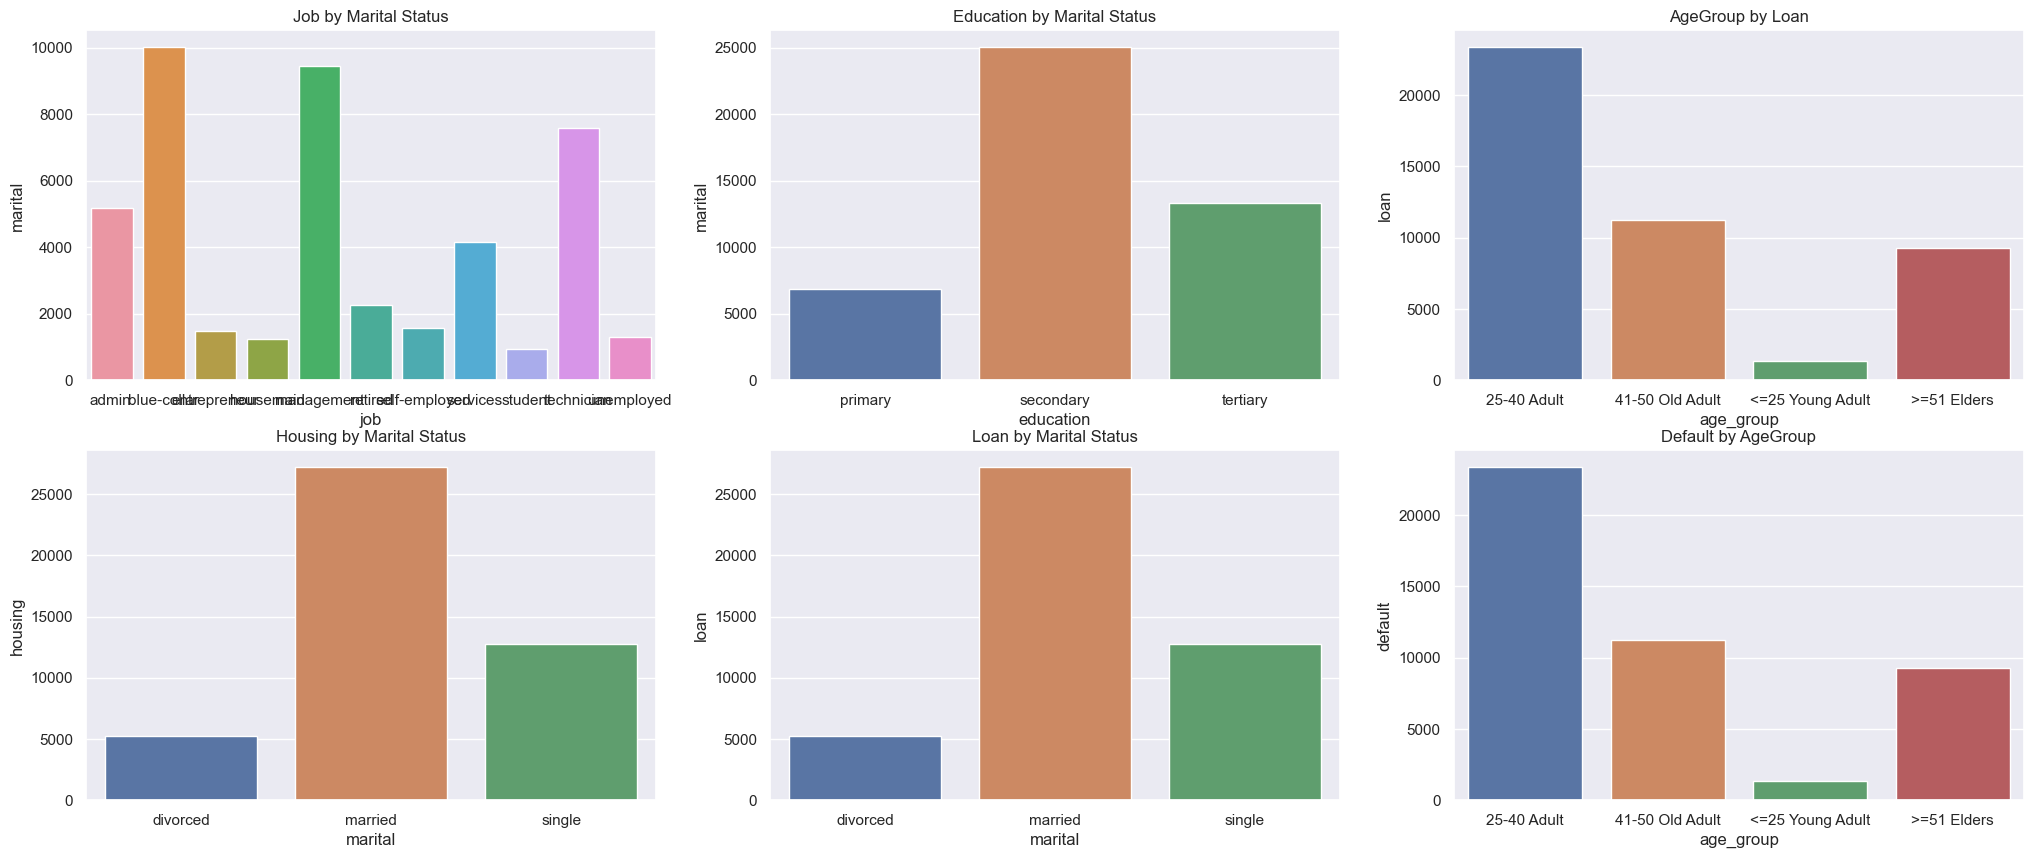

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
sns.barplot(x='age_group', data=cust_jobA, y='loan', ax=axs[0,2])
axs[0,2].set_title("AgeGroup by Loan")

sns.barplot(x='education', data=cust_jobE, y='marital', ax=axs[0,1])
axs[0,1].set_title("Education by Marital Status")

sns.barplot(x='job', data=cust_jobM, y='marital', ax=axs[0,0])
axs[0,0].set_title("Job by Marital Status")

sns.barplot(x='marital', data=cust_jobH, y='housing', ax=axs[1,0])
axs[1,0].set_title("Housing by Marital Status")

sns.barplot(x='marital', data=cust_jobL, y='loan', ax=axs[1,1])
axs[1,1].set_title("Loan by Marital Status")

sns.barplot(x='age_group', data=cust_jobD, y='default', ax=axs[1,2])
axs[1,2].set_title("Default by AgeGroup")


Observation:
The above is a pictorial description of bivariate analysis that cuts across the below
1. AgeGroup By Loan: Peeps between the age 25 - 40(Adult) is noted to have taken the highest loans.
2. AgeGroup By Default: Peeps between the age 25 - 40(Adult) is noted to be the highest defaulters. This means as much as they take loans, they also default.

In [ ]:
# MULTIVARIATE ANALYSIS

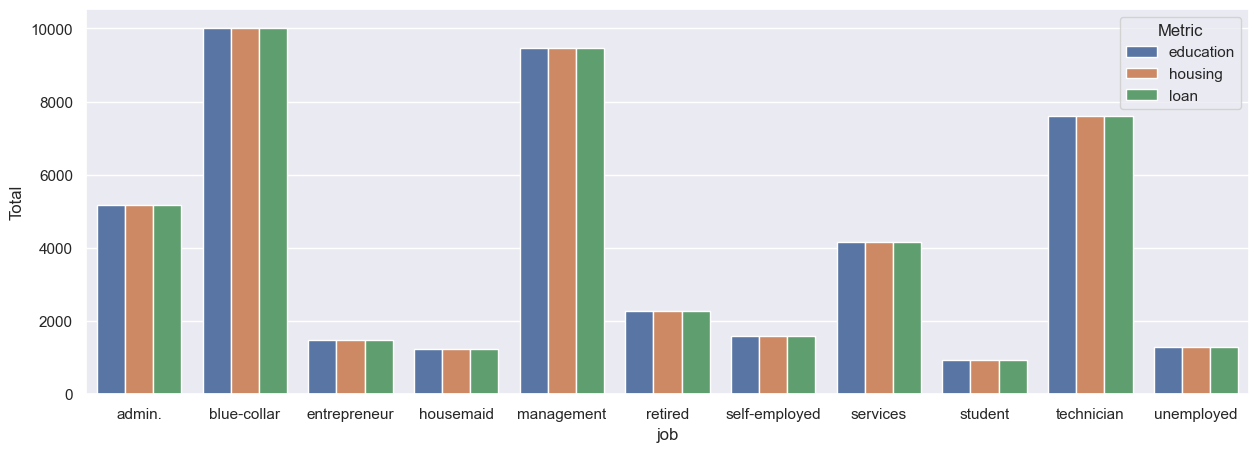

In [64]:
plt.figure(figsize=(15,5))
JobMat = df1.groupby("job")[["education", "housing", "loan"]].count().reset_index()
JobMat = pd.melt(JobMat, id_vars="job", var_name="Metric", value_name="Total")
sns.barplot(data=JobMat, x='job', y="Total", hue="Metric");

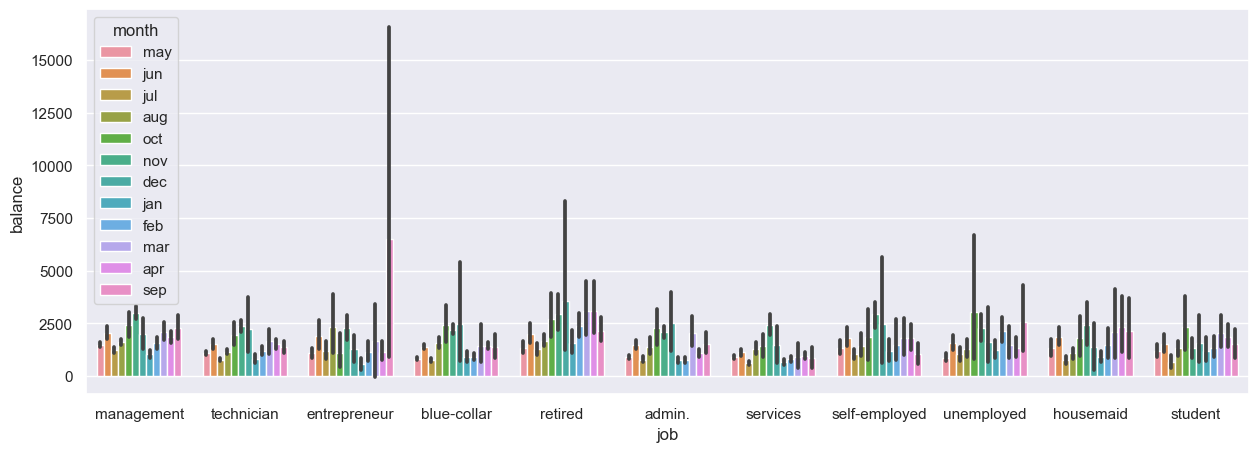

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(x='job', y="balance", data=df1, hue='month');

In [66]:
# Creating a Pivot Table
df1.pivot_table(values='balance', index='month', columns='job', aggfunc='sum')

job     admin.  blue-collar  entrepreneur  housemaid  management  retired  \
month                                                                       
apr     439396      1097253         81467     117815     1018145   444976   
aug     495737      1048258        190047     280543     3212272   657552   
dec      57459        32194          3808       8246      101558   146325   
feb     234143       378742         99722      76098      865103   397070   
jan     134792       177566         21050      29205      298673   138438   
jul     675105      1088248        352797     210484     1667420   438577   
jun     872874      1912074        414194     498897     1888549   611115   
mar     152959        38100          3373      27372      302833   202939   
may    1580749      3662350        445251     203568     3246213   478541   
nov     873414      1349716        559158     197327     3264344   403183   
oct     238401       170632         13330      47237      427185   364501   
sep     118394        54447         78229      29778      387993   209046   

job    self-employed  services  student  technician  unemployed  
month                                                            
apr           156127    266242   166933      651688       82718  
aug           301269    347200   146368     2118755      120852  
dec            14696     21780    26784       69798       12906  
feb           155633    170421   122588      510963      483810  
jan            63804     87837    47285      205613      124074  
jul           254247    469959    46820      817776      184243  
jun           386322    579468   130644     1043449      251929  
mar            29149     17657    79524       94379       27766  
may           490184   1400360   300367     2205989      234136  
nov           689028    734671    69136     1502156      334211  
oct            48390     28327    90337      208583       69607  
sep            13297     17982    75215       87097       56583

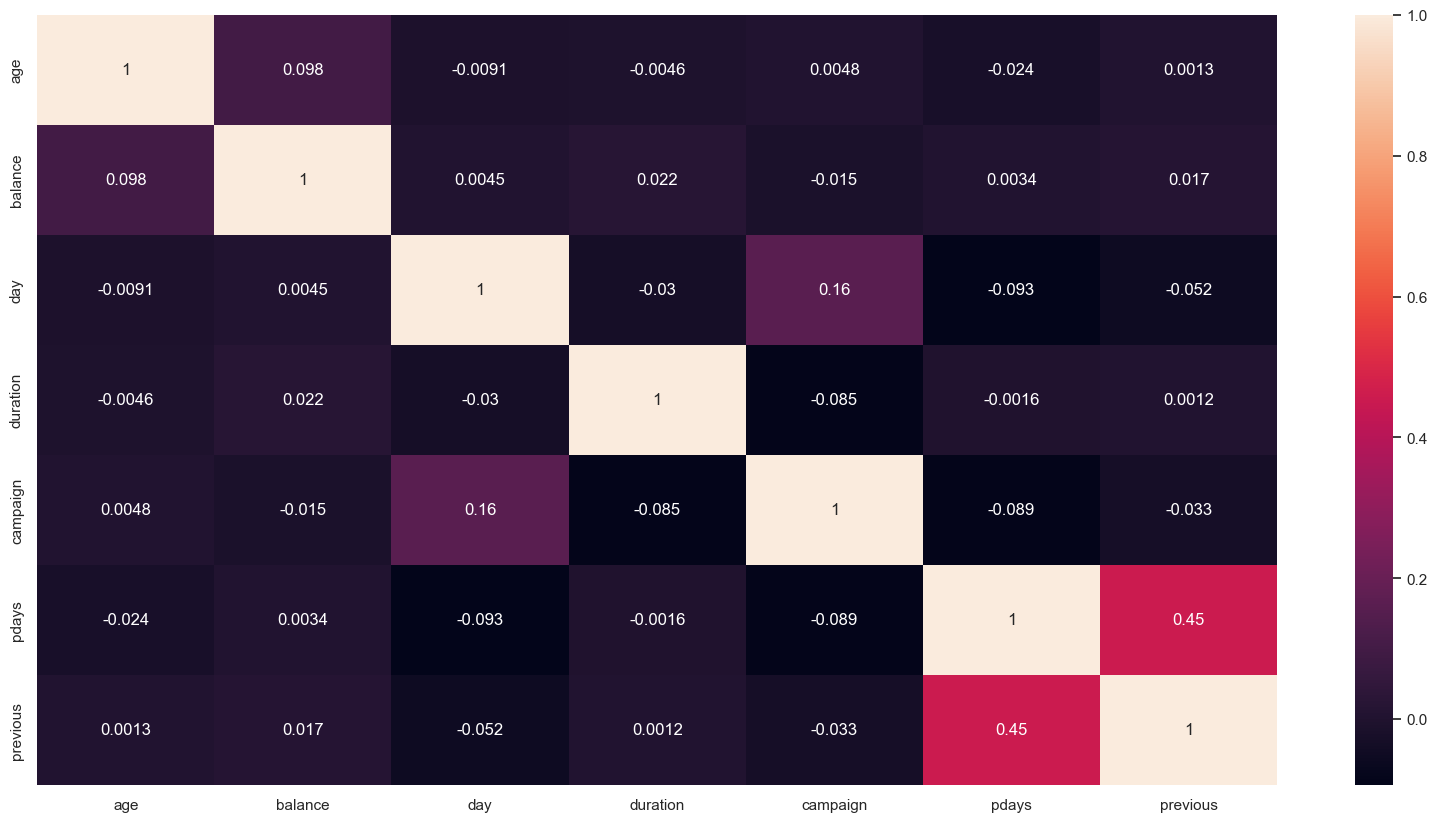

In [67]:
# Relationships through Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True);

In [68]:
# Profiling
Capstone_profile = ProfileReport(df1)
Capstone_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation:
The profile report provides a comprehensive report of the dataset. It gives a grasp of the structure and properties of the dataset.  

In [69]:
# ENCODING CATEGORICAL VARIABLES
df2=df.copy()
df2.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [70]:
# Convert the Dependent Variable(Loan) to Numerical Variable
df2['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df2['loan']

0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int64

In [71]:
#Split the Data by removing Loan from the dataset
X = df2.drop(['loan'], axis=1)
y = df2['loan']


In [73]:
# Train-Test Split - Loan
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


Note:
The 80-20 test size is considered here.

In [75]:
#Convert All Categorical Variables (Aside Loan) into Numerical But first identify the categorical
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [76]:

# Apply pd.get_dummies on training and test data

X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'poutcome', 'deposit'])
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'poutcome', 'deposit'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [77]:
display(X_train.head())
display(X_test.head())

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3344    41      849   15        72         1     -1         0           0   
17965   49     1415   30       269         2     -1         0           0   
18299   42     3842   31       130         4     -1         0           1   
10221   37     -119   11       375        11     -1         0           0   
32192   56     3498   15       264         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_may  month_nov  \
3344                 1                 0  ...          1          0   
17965                0                 0  ...          0          0   
18299                0                 0  ...          0          0   
10221                0                 0  ...          0          0   
32192                1                 0  ...          0          0   

       month_oct  month_sep  poutcome_failure  poutcome_other  \
3344           0          0                 0               0   
17965          0          0                 0               0   
18299          0          0                 0               0   
10221          0          0                 0               0   
32192          0          0                 0               0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3344                  0                 1           1            0  
17965                 0                 1           1            0  
18299                 0                 1           1            0  
10221                 0                 1           1            0  
32192                 0                 1           0            1  

[5 rows x 51 columns]

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3776    40      580   16       192         1     -1         0           0   
9928    47     3644    9        83         2     -1         0           0   
33409   25      538   20       226         1     -1         0           0   
31885   42     1773    9       311         1    336         1           0   
15738   56      217   21       121         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_may  month_nov  \
3776                 1                 0  ...          1          0   
9928                 0                 0  ...          0          0   
33409                0                 0  ...          0          0   
31885                0                 0  ...          0          0   
15738                0                 0  ...          0          0   

       month_oct  month_sep  poutcome_failure  poutcome_other  \
3776           0          0                 0               0   
9928           0          0                 0               0   
33409          0          0                 0               0   
31885          0          0                 1               0   
15738          0          0                 0               0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3776                  0                 1           1            0  
9928                  0                 1           1            0  
33409                 0                 1           1            0  
31885                 0                 0           1            0  
15738                 0                 1           1            0  

[5 rows x 51 columns]

In [78]:
# Feature Scaling
#Using Robust Scaler to enhance the removal of outliers
from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])

Note:
Robust Scaler is the most accurate when it comes to removing outliers.

In [79]:
display(X_train.head())
display(X_test.head())

age   balance       day  duration  campaign  pdays  previous  \
3344   0.133333  0.295806 -0.076923 -0.502326      -0.5    0.0       0.0   
17965  0.666667  0.712288  1.076923  0.413953       0.0    0.0       0.0   
18299  0.200000  2.498160  1.153846 -0.232558       1.0    0.0       0.0   
10221 -0.133333 -0.416483 -0.384615  0.906977       4.5    0.0       0.0   
32192  1.133333  2.245033 -0.076923  0.390698       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_may  \
3344          0.0              1.0               0.0  ...        1.0   
17965         0.0              0.0               0.0  ...        0.0   
18299         1.0              0.0               0.0  ...        0.0   
10221         0.0              0.0               0.0  ...        0.0   
32192         0.0              1.0               0.0  ...        0.0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
3344         0.0        0.0        0.0               0.0             0.0   
17965        0.0        0.0        0.0               0.0             0.0   
18299        0.0        0.0        0.0               0.0             0.0   
10221        0.0        0.0        0.0               0.0             0.0   
32192        0.0        0.0        0.0               0.0             0.0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3344                0.0               0.0         0.0          0.0  
17965               0.0               0.0         0.0          0.0  
18299               0.0               0.0         0.0          0.0  
10221               0.0               0.0         0.0          0.0  
32192               0.0               0.0        -1.0          1.0  

[5 rows x 51 columns]

age   balance       day  duration  campaign  pdays  previous  \
3776   0.066667  0.094276  0.000000  0.046083      -0.5    0.0       0.0   
9928   0.533333  2.386831 -0.538462 -0.456221       0.0    0.0       0.0   
33409 -0.933333  0.062851  0.307692  0.202765      -0.5    0.0       0.0   
31885  0.200000  0.986906 -0.538462  0.594470      -0.5  337.0       1.0   
15738  1.133333 -0.177329  0.384615 -0.281106       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_may  \
3776          0.0              1.0               0.0  ...        1.0   
9928          0.0              0.0               0.0  ...        0.0   
33409         0.0              0.0               0.0  ...        0.0   
31885         0.0              0.0               0.0  ...        0.0   
15738         0.0              0.0               0.0  ...        0.0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
3776         0.0        0.0        0.0               0.0             0.0   
9928         0.0        0.0        0.0               0.0             0.0   
33409        0.0        0.0        0.0               0.0             0.0   
31885        0.0        0.0        0.0               1.0             0.0   
15738        0.0        0.0        0.0               0.0             0.0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3776                0.0               0.0         0.0          0.0  
9928                0.0               0.0         0.0          0.0  
33409               0.0               0.0         0.0          0.0  
31885               0.0              -1.0         0.0          0.0  
15738               0.0               0.0         0.0          0.0  

[5 rows x 51 columns]

In [ ]:
print(X_train.shape)
print(X_test.shape)

Note:
9,043 is 20% of the dataset used for the test

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7634
           1       0.25      0.28      0.26      1409

    accuracy                           0.75      9043
   macro avg       0.55      0.56      0.56      9043
weighted avg       0.77      0.75      0.76      9043



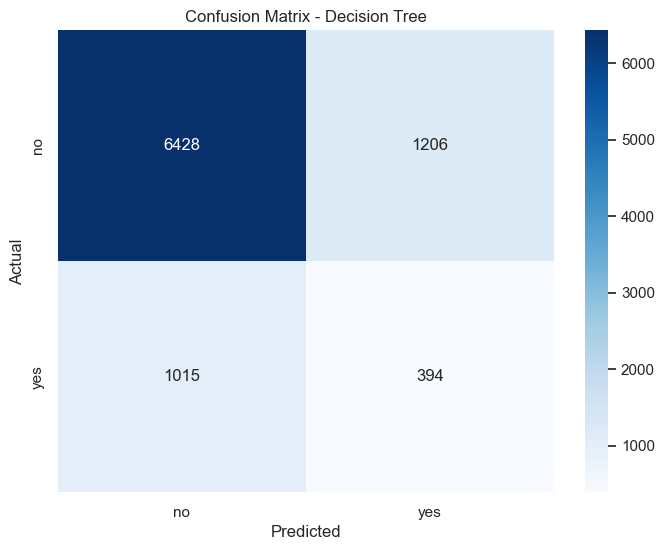





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      7634
           1       0.34      0.12      0.18      1409

    accuracy                           0.83      9043
   macro avg       0.60      0.54      0.54      9043
weighted avg       0.78      0.83      0.79      9043



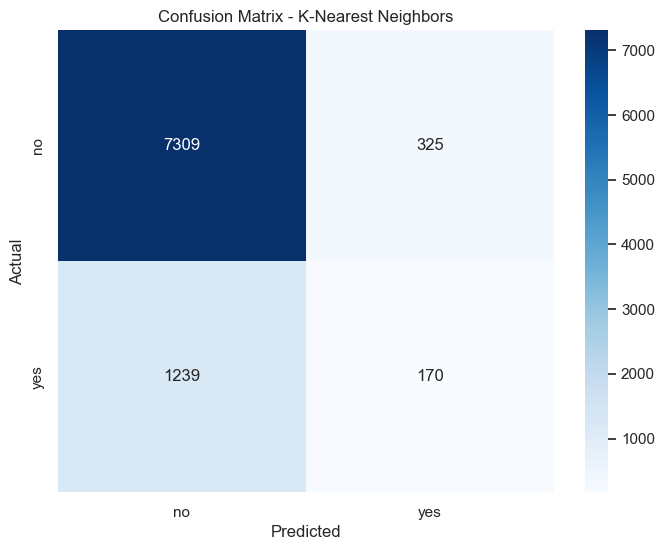





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      7634
           1       0.00      0.00      0.00      1409

    accuracy                           0.84      9043
   macro avg       0.42      0.50      0.46      9043
weighted avg       0.71      0.84      0.77      9043



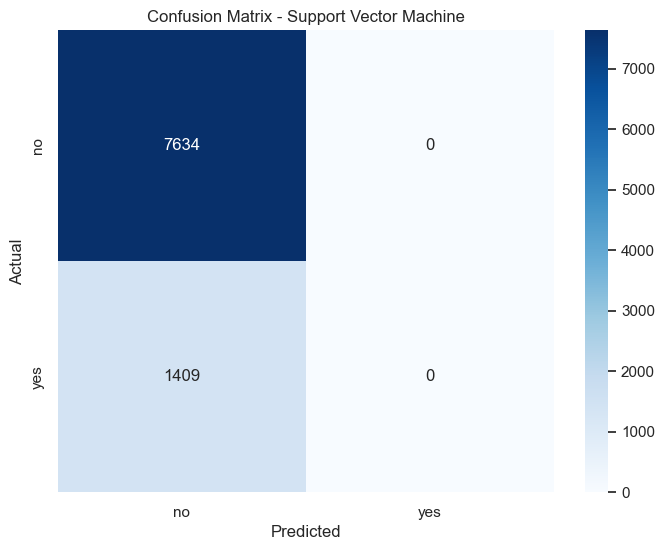





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      7634
           1       0.58      0.00      0.01      1409

    accuracy                           0.84      9043
   macro avg       0.71      0.50      0.46      9043
weighted avg       0.80      0.84      0.77      9043



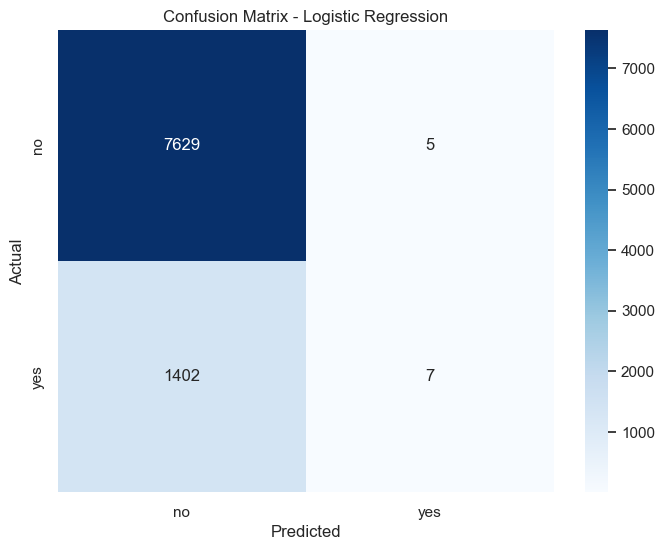





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7634
           1       0.49      0.09      0.15      1409

    accuracy                           0.84      9043
   macro avg       0.67      0.54      0.53      9043
weighted avg       0.80      0.84      0.79      9043



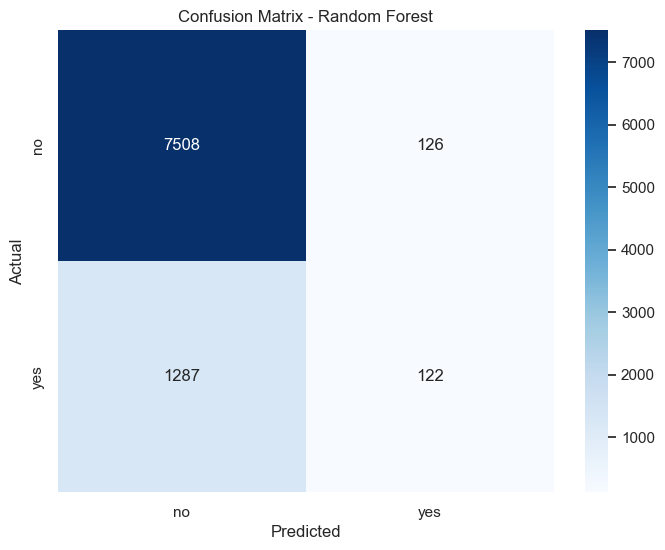





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.31      0.46      7634
           1       0.19      0.86      0.31      1409

    accuracy                           0.40      9043
   macro avg       0.55      0.58      0.39      9043
weighted avg       0.81      0.40      0.44      9043



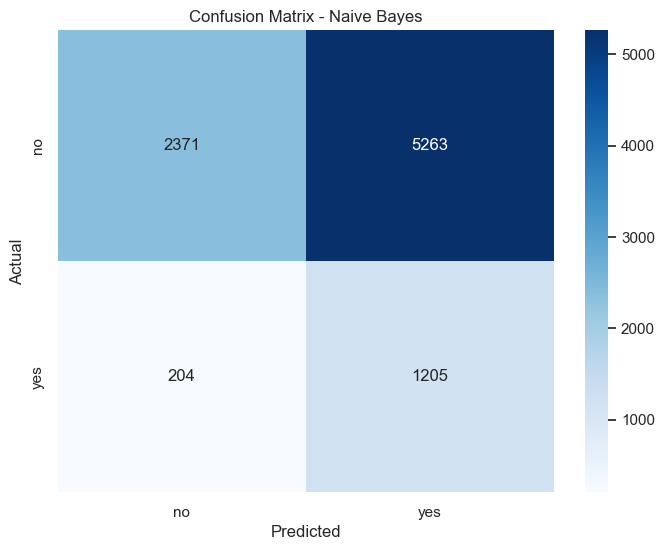





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      7634
           1       0.52      0.06      0.11      1409

    accuracy                           0.85      9043
   macro avg       0.69      0.53      0.51      9043
weighted avg       0.80      0.85      0.79      9043



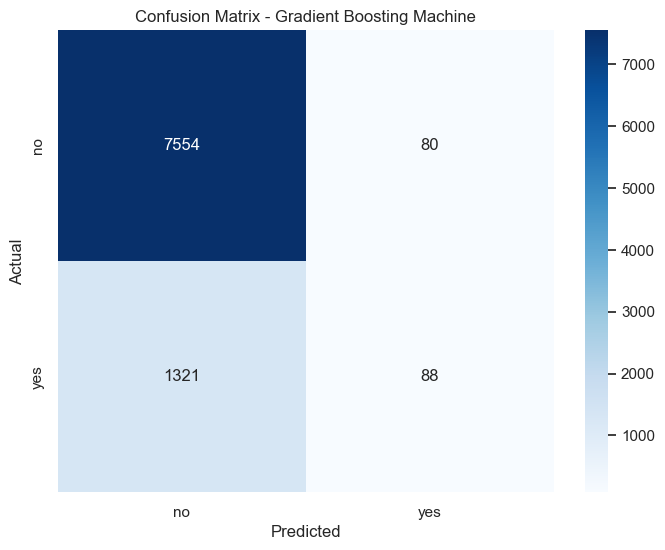





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      7634
           1       0.46      0.11      0.18      1409

    accuracy                           0.84      9043
   macro avg       0.66      0.54      0.54      9043
weighted avg       0.79      0.84      0.80      9043



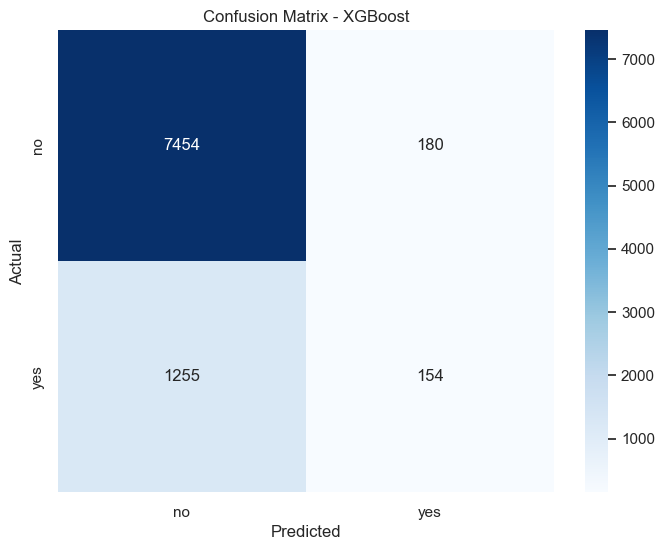

In [80]:
# Model Selection, Training & Validation
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]
# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
# Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
# Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [83]:
# Summary
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)

Model  Accuracy  Precision    Recall  F1-Score
7                    XGBoost  0.841314   0.794379  0.841314  0.797598
0              Random Forest  0.843747   0.797305  0.843747  0.794527
1        K-Nearest Neighbors  0.827049   0.775338  0.827049  0.790421
2  Gradient Boosting Machine  0.845074   0.800151  0.845074  0.789938
3        Logistic Regression  0.844410   0.804024  0.844410  0.774450
4     Support Vector Machine  0.844189   0.712655  0.844189  0.772865
5              Decision Tree  0.754396   0.767436  0.754396  0.760635
6                Naive Bayes  0.395444   0.806337  0.395444  0.439790

Observation:
1. Using the summary of the analysis above and picking the highest F1-score;
XGBoost and Random Forest are the 2 most efficient models to be condisered as they came out with 0.797 and 0.792 respectively.

2. For XGBoost, 7454 tested true positive for actual(No loans)  while 1255 tested false negative by prediction(Yes - Loan).

3. Random Forest: 7497 tested true positive for actual(No loans)  while 1291 tested false negative by prediction(Yes - Loan).


In [84]:
# Features with the highest impact on Loan
importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
38            month_jul    0.181901
28           housing_no    0.056075
15          job_student    0.042721
25    education_unknown    0.034297
17       job_unemployed    0.029514
42            month_nov    0.028157
49           deposit_no    0.025650
18          job_unknown    0.024395
37            month_jan    0.022407
21       marital_single    0.021619
26           default_no    0.021074
47     poutcome_success    0.019638
9      job_entrepreneur    0.019618
1               balance    0.019468
41            month_may    0.018998
12          job_retired    0.018926
22    education_primary    0.018073
23  education_secondary    0.018056
33            month_apr    0.017142
34            month_aug    0.016807
39            month_jun    0.016655
10        job_housemaid    0.016471
5                 pdays    0.016086
31    contact_telephone    0.014834
7            job_admin.    0.014693
2                   day    0.014425
19     marital_divorced    0

Observation:
The highest feature that has a great impact on the metrics is poutcome_success. This means the impact of the previous marketing campaign is good and should be replicated.

In [85]:
#Testing for the second supervised learning model
df3=df.copy()
df3.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [86]:
# Convert the Dependent Variable(Deposit) to Numerical Variable
df3['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})
df3['deposit']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int64

In [87]:
#Split the Data by removing Deposit from the dataset
X = df3.drop(['deposit'], axis=1)
y = df3['deposit']


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


Observation:
The 80-20 test size is considered here.

In [89]:
#Convert All Categorical Variables (aside Deposit) into Numerical But first identify the categorical
categorical = []
numerical = []

for i in df.columns:
    
    if df[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [90]:
# Apply pd.get_dummies on training and test data

X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'default', 'loan', 'housing', 'contact', 'month', 'poutcome'])
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'education', 'default', 'loan', 'housing', 'contact', 'month', 'poutcome'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [91]:
display(X_train.head())
display(X_test.head())

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3344    41      849   15        72         1     -1         0           0   
17965   49     1415   30       269         2     -1         0           0   
18299   42     3842   31       130         4     -1         0           1   
10221   37     -119   11       375        11     -1         0           0   
32192   56     3498   15       264         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
3344                 1                 0  ...          0          0   
17965                0                 0  ...          0          0   
18299                0                 0  ...          0          0   
10221                0                 0  ...          1          0   
32192                1                 0  ...          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3344           1          0          0          0                 0   
17965          0          0          0          0                 0   
18299          0          0          0          0                 0   
10221          0          0          0          0                 0   
32192          0          0          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
3344                0                 0                 1  
17965               0                 0                 1  
18299               0                 0                 1  
10221               0                 0                 1  
32192               0                 0                 1  

[5 rows x 51 columns]

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3776    40      580   16       192         1     -1         0           0   
9928    47     3644    9        83         2     -1         0           0   
33409   25      538   20       226         1     -1         0           0   
31885   42     1773    9       311         1    336         1           0   
15738   56      217   21       121         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
3776                 1                 0  ...          0          0   
9928                 0                 0  ...          1          0   
33409                0                 0  ...          0          0   
31885                0                 0  ...          0          0   
15738                0                 0  ...          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3776           1          0          0          0                 0   
9928           0          0          0          0                 0   
33409          0          0          0          0                 0   
31885          0          0          0          0                 1   
15738          0          0          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
3776                0                 0                 1  
9928                0                 0                 1  
33409               0                 0                 1  
31885               0                 0                 0  
15738               0                 0                 1  

[5 rows x 51 columns]

In [92]:
# Feature Scaling
#Using Robust Scaler to enhance the removal of outliers
from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])

In [93]:
display(X_train.head())
display(X_test.head())

age   balance       day  duration  campaign  pdays  previous  \
3344   0.133333  0.295806 -0.076923 -0.502326      -0.5    0.0       0.0   
17965  0.666667  0.712288  1.076923  0.413953       0.0    0.0       0.0   
18299  0.200000  2.498160  1.153846 -0.232558       1.0    0.0       0.0   
10221 -0.133333 -0.416483 -0.384615  0.906977       4.5    0.0       0.0   
32192  1.133333  2.245033 -0.076923  0.390698       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
3344          0.0              1.0               0.0  ...        0.0   
17965         0.0              0.0               0.0  ...        0.0   
18299         1.0              0.0               0.0  ...        0.0   
10221         0.0              0.0               0.0  ...        1.0   
32192         0.0              1.0               0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
3344         0.0        1.0        0.0        0.0        0.0   
17965        0.0        0.0        0.0        0.0        0.0   
18299        0.0        0.0        0.0        0.0        0.0   
10221        0.0        0.0        0.0        0.0        0.0   
32192        0.0        0.0        0.0        0.0        0.0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
3344                0.0             0.0               0.0               0.0  
17965               0.0             0.0               0.0               0.0  
18299               0.0             0.0               0.0               0.0  
10221               0.0             0.0               0.0               0.0  
32192               0.0             0.0               0.0               0.0  

[5 rows x 51 columns]

age   balance       day  duration  campaign  pdays  previous  \
3776   0.066667  0.094276  0.000000  0.046083      -0.5    0.0       0.0   
9928   0.533333  2.386831 -0.538462 -0.456221       0.0    0.0       0.0   
33409 -0.933333  0.062851  0.307692  0.202765      -0.5    0.0       0.0   
31885  0.200000  0.986906 -0.538462  0.594470      -0.5  337.0       1.0   
15738  1.133333 -0.177329  0.384615 -0.281106       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
3776          0.0              1.0               0.0  ...        0.0   
9928          0.0              0.0               0.0  ...        1.0   
33409         0.0              0.0               0.0  ...        0.0   
31885         0.0              0.0               0.0  ...        0.0   
15738         0.0              0.0               0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
3776         0.0        1.0        0.0        0.0        0.0   
9928         0.0        0.0        0.0        0.0        0.0   
33409        0.0        0.0        0.0        0.0        0.0   
31885        0.0        0.0        0.0        0.0        0.0   
15738        0.0        0.0        0.0        0.0        0.0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
3776                0.0             0.0               0.0               0.0  
9928                0.0             0.0               0.0               0.0  
33409               0.0             0.0               0.0               0.0  
31885               1.0             0.0               0.0              -1.0  
15738               0.0             0.0               0.0               0.0  

[5 rows x 51 columns]

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



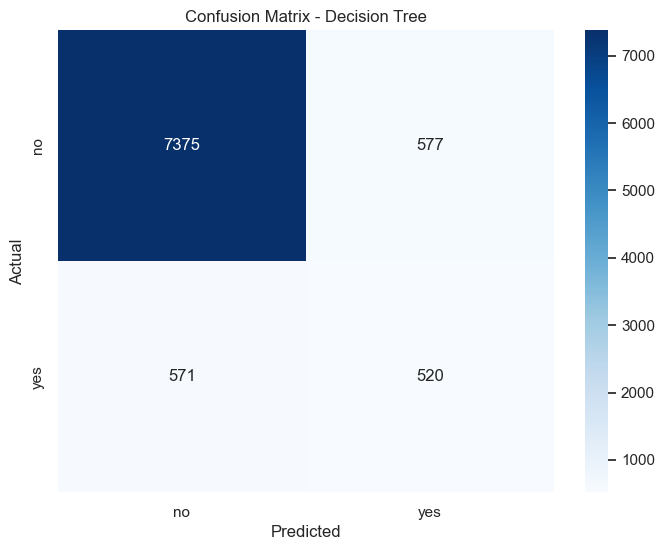





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.34      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.89      0.88      9043



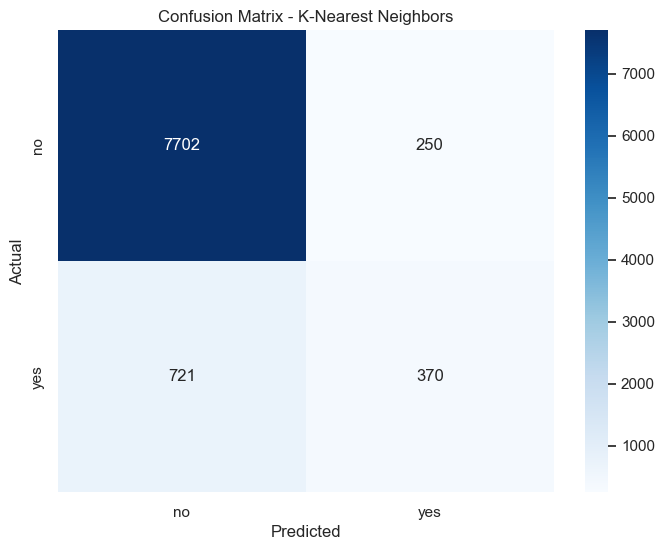





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



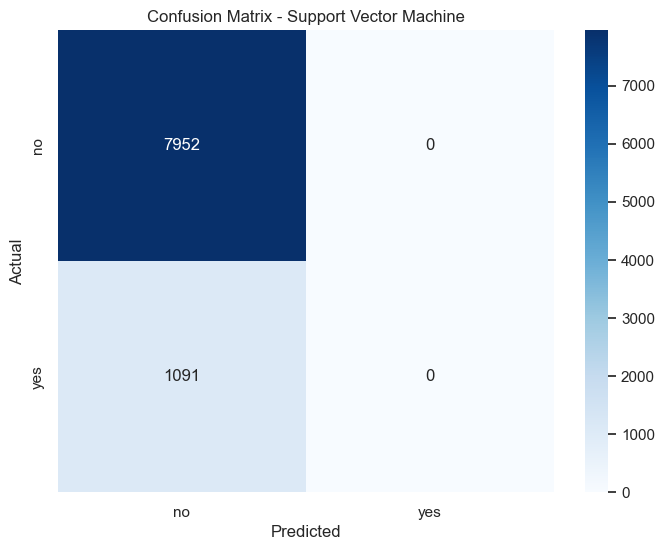





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



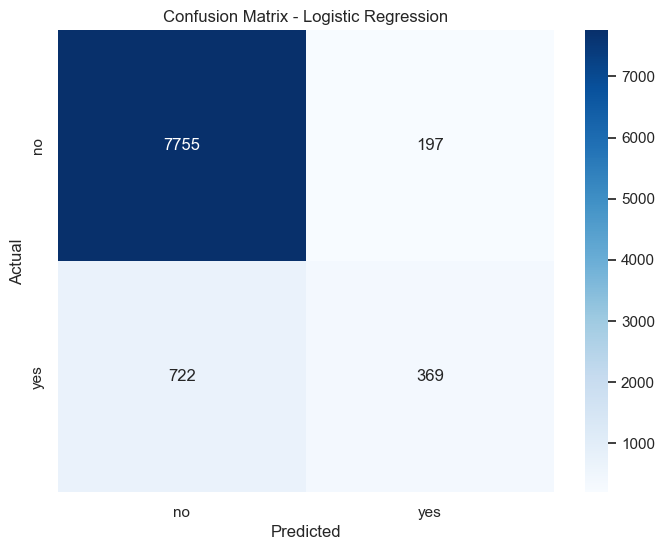





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.68      0.42      0.52      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.89      0.91      0.90      9043



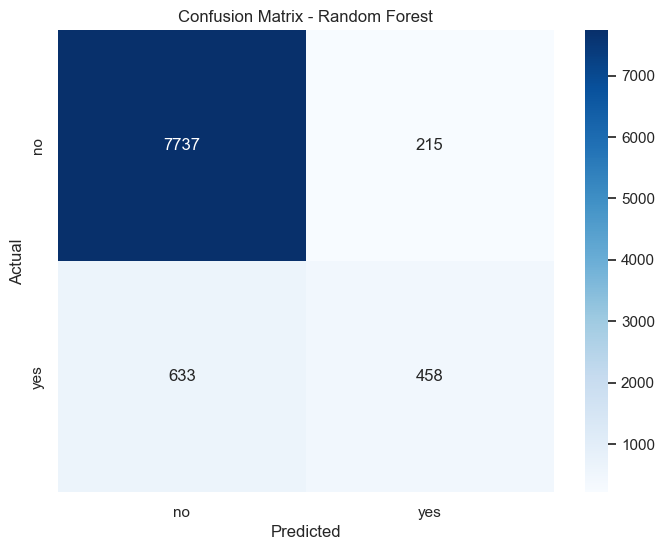





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7952
           1       0.39      0.51      0.44      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.70      0.68      9043
weighted avg       0.87      0.85      0.85      9043



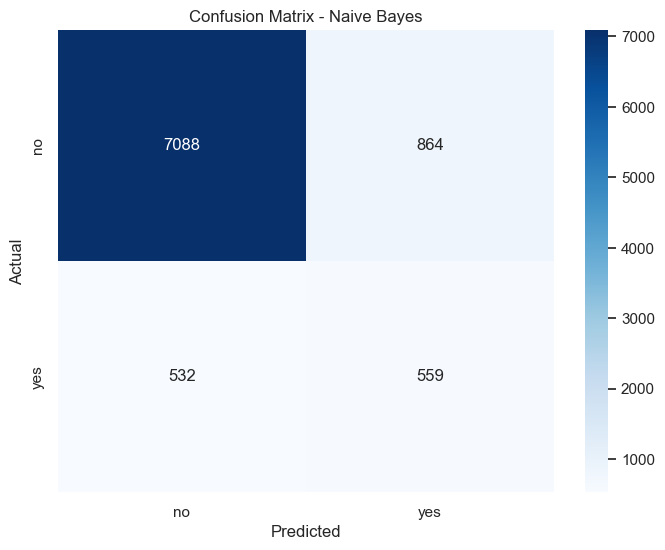





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



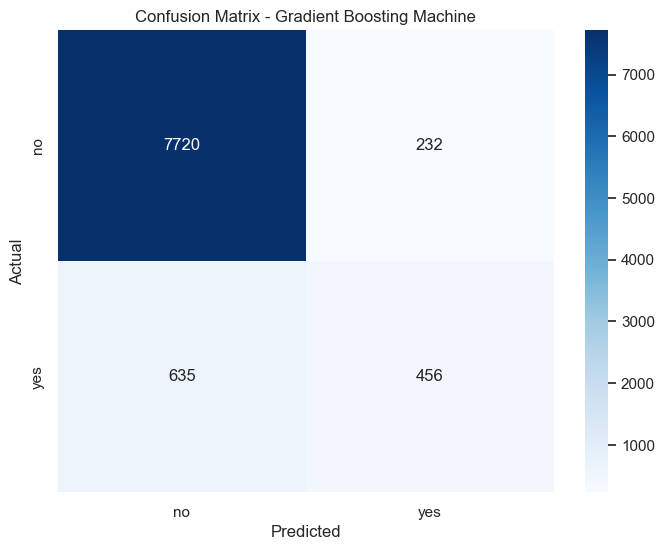





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043



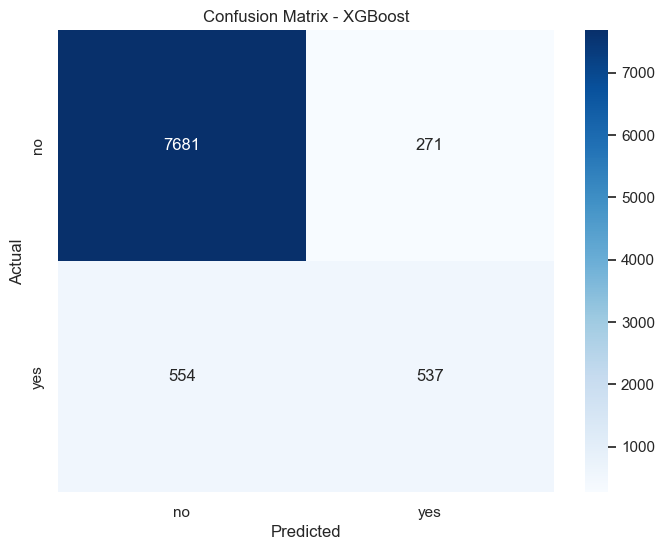

In [94]:
# Model Selection, Training & Validation
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]
# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
# Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
# Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [95]:
# Summary
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)

Model  Accuracy  Precision    Recall  F1-Score
7                    XGBoost  0.908769   0.900378  0.908769  0.902769
0              Random Forest  0.906226   0.894955  0.906226  0.896316
1  Gradient Boosting Machine  0.904125   0.892484  0.904125  0.894450
2        Logistic Regression  0.898374   0.883112  0.898374  0.883899
3        K-Nearest Neighbors  0.892624   0.876081  0.892624  0.879389
4              Decision Tree  0.873051   0.873352  0.873051  0.873201
5                Naive Bayes  0.845626   0.865355  0.845626  0.854174
6     Support Vector Machine  0.879354   0.773264  0.879354  0.822904

Observation:
* Using the summary of the analysis above and picking the 2 highest F1-score;
XGBoost and Gradient Boosting Machine are the 2 most efficient models to be condisered as they came out with 0.902 and 0.894 respectively.



In [96]:
# Features with the highest impact on Loan
importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
49     poutcome_success    0.219707
34      contact_unknown    0.088121
42            month_mar    0.050826
3              duration    0.042660
45            month_oct    0.039759
41            month_jun    0.038485
35            month_apr    0.031300
46            month_sep    0.030984
30           housing_no    0.030599
28              loan_no    0.024898
37            month_dec    0.023950
38            month_feb    0.022073
44            month_nov    0.021853
40            month_jul    0.019421
43            month_may    0.017319
39            month_jan    0.015799
36            month_aug    0.015716
8       job_blue-collar    0.015548
5                 pdays    0.014061
2                   day    0.013297
33    contact_telephone    0.012710
24   education_tertiary    0.011403
32     contact_cellular    0.011137
0                   age    0.010797
20      marital_married    0.009814
48       poutcome_other    0.009763
4              campaign    0

Observation:
The highest feature that has a great impact on the metrics is poutcome_success. This means the impact of the previous marketing campaign is good and should be replicated. Amazingly, the unknown method of contact used to reach out to customers also made impact on the metrics.

In [97]:
# UNSUPERVISED LEARNING
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [98]:
# Choosing 2 columns to compare(Age Vs Balance)
Y= df.iloc[:, [0,5]]. values

Observation:
Age = 0, Job = 1, Marital = 2, Education = 3, Default = 4, Balance = 5
The comparison is between 0 and 5(Age and Balance)

In [99]:
Y

array([[  58, 2143],
       [  44,   29],
       [  33,    2],
       ...,
       [  72, 5715],
       [  57,  668],
       [  37, 2971]], dtype=int64)

In [100]:
from sklearn.cluster import KMeans
wcss = []

In [101]:
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

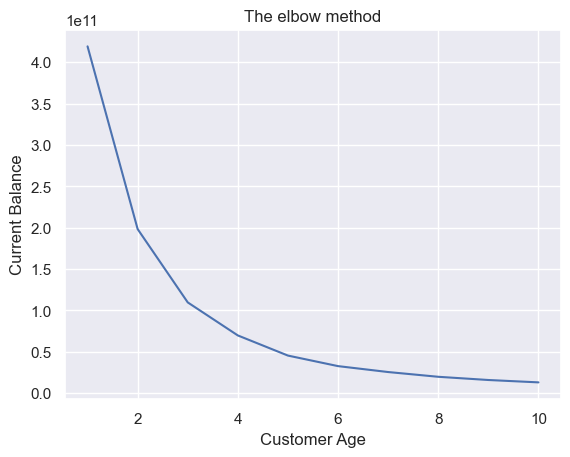

In [102]:
# Using the Elbow Method to determine the number of clusters.
# The best cluster is 5

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Customer Age')
plt.ylabel('Current Balance')
plt.show()

Note:
The Elbow method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.
* The peak, which is identified as the optimum K, is approximated to be 5(because it has to an integer).

In [107]:
kmeansmodel= KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [108]:
y_kmeans = kmeansmodel.fit_predict(Y)

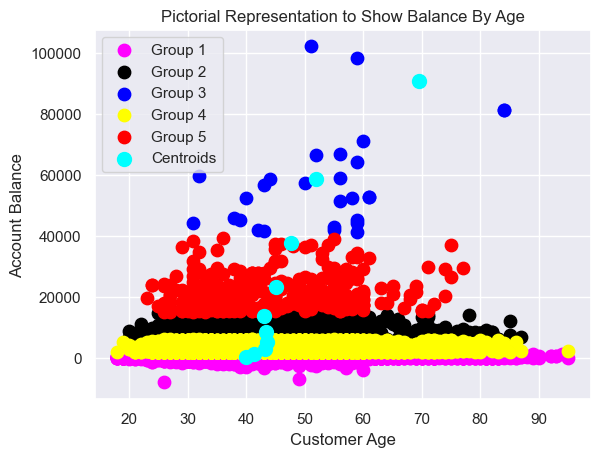

In [109]:
plt.scatter(Y[y_kmeans == 0,0], Y[y_kmeans == 0,1], s= 80, c= 'magenta', label= 'Group 1')
plt.scatter(Y[y_kmeans == 1,0], Y[y_kmeans == 1,1], s= 80, c= 'black', label= 'Group 2')
plt.scatter(Y[y_kmeans == 2,0], Y[y_kmeans == 2,1], s= 80, c= 'blue', label= 'Group 3')
plt.scatter(Y[y_kmeans == 3,0], Y[y_kmeans == 3,1], s= 80, c= 'yellow', label= 'Group 4')
plt.scatter(Y[y_kmeans == 4,0], Y[y_kmeans == 4,1], s= 80, c= 'red', label= 'Group 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label = 'Centroids')
plt.title('Pictorial Representation to Show Balance By Age')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend()
plt.show()

Observation:
1. Group 3 has the highest balances. Whatsoever was done to retain this should be maintained.
2. Group 5 however, has the highest frequency. Group 3 methodology can be enacted here.
3. Group 1 appears to have balances <=0, this should be noted as well.
4. The centroids represents the centre of the cluster(the mean)